In [19]:
import json
import re
import ssl

import certifi
import geopy
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from geopy import Nominatim

In [20]:
# to potrzebne, bo inaczej wyskakuje GeocoderServiceError, ale ogólnie bardzo niewskazane XD
ssl._create_default_https_context = ssl._create_unverified_context

In [21]:
pos = json.load(open("station_pos_new.json","r", encoding="utf-8"))

In [22]:
pos["Łąg"] = [18.065844820300693, 53.831195018983074]
pos["Radomyśl"] = [ 22.381036085411196, 52.03110791812052]
pos["Jagodin"] = [ 15.169937485645997, 51.35570663746631]
pos["Jarosław"] = [22.677651659198048, 50.011096189470834]
pos["Chałupki"] = [18.311526302001212, 49.925748636690045]

In [23]:
p = pd.read_csv("data/connections_test2.csv",encoding="utf-8-sig")
len(p)

71154

In [24]:
print(len(p[['stacja_wyjazdu','stacja_przyjazdu']]))
print(len(p[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()))
unique_connections = p[['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
unique_connections = [(conn[1],conn[2]) for conn in unique_connections.itertuples()]
unique_connections.sort()

71154
1138


In [25]:
unique_connections

[('Aleksandrów\xa0Kujawski', 'Toruń\xa0Główny'),
 ('Aleksandrów\xa0Kujawski', 'Włocławek'),
 ('Augustów', 'Dąbrowa\xa0Białostocka'),
 ('Augustów', 'Suwałki'),
 ('Babiak', 'Kutno'),
 ('Babiak', 'Piotrków\xa0Kujawski'),
 ('Babimost', 'Sulechów'),
 ('Babimost', 'Zbąszynek'),
 ('Baciuty', 'Niewodnica'),
 ('Baciuty', 'Trypucie'),
 ('Baciuty', 'Łapy'),
 ('Barczewo', 'Korsze'),
 ('Barczewo', 'Olsztyn\xa0Główny'),
 ('Bardo\xa0Śląskie', 'Kamieniec\xa0Ząbkowicki'),
 ('Bardo\xa0Śląskie', 'Kłodzko\xa0Główne'),
 ('Biała\xa0Piska', 'Ełk'),
 ('Biała\xa0Piska', 'Pisz'),
 ('Biała\xa0Podlaska', 'Chotyłów'),
 ('Biała\xa0Podlaska', 'Międzyrzec\xa0Podlaski'),
 ('Biała\xa0Podlaska', 'Terespol'),
 ('Białogard', 'Koszalin'),
 ('Białogard', 'Kołobrzeg'),
 ('Białogard', 'Szczecinek'),
 ('Białogard', 'Świdwin'),
 ('Białystok', 'Białystok\xa0Starosielce'),
 ('Białystok', 'Bielsk\xa0Podlaski'),
 ('Białystok', 'Niewodnica'),
 ('Białystok', 'Sokółka'),
 ('Białystok', 'Łapy'),
 ('Białystok\xa0Starosielce', 'Białystok

In [28]:
test_trains = p["nazwa_pociagu"].unique()
len(test_trains)

390

ECE 14000/1 SILESIA
[('Warszawa\xa0Wschodnia', 'Warszawa\xa0Centralna'), ('Warszawa\xa0Centralna', 'Warszawa\xa0Zachodnia'), ('Warszawa\xa0Zachodnia', 'Grodzisk\xa0Mazowiecki'), ('Grodzisk\xa0Mazowiecki', 'Opoczno\xa0Południe'), ('Opoczno\xa0Południe', 'Włoszczowa\xa0Północ'), ('Włoszczowa\xa0Północ', 'Zawiercie'), ('Zawiercie', 'Dąbrowa\xa0Górnicza'), ('Dąbrowa\xa0Górnicza', 'Sosnowiec\xa0Główny'), ('Sosnowiec\xa0Główny', 'Katowice'), ('Katowice', 'Tychy'), ('Tychy', 'Rybnik'), ('Rybnik', 'Wodzisław\xa0Śląski'), ('Wodzisław\xa0Śląski', 'Chałupki'), ('Chałupki', 'Bohumin')]
ECE 40001 MORAVIA
[('Katowice', 'Zabrze'), ('Zabrze', 'Gliwice'), ('Gliwice', 'Racibórz'), ('Racibórz', 'Chałupki'), ('Chałupki', 'Bohumin')]
EIE 8306/7 MALCZEWSKI
[('Kołobrzeg', 'Białogard'), ('Białogard', 'Szczecinek'), ('Szczecinek', 'Jastrowie'), ('Jastrowie', 'Piła\xa0Główna'), ('Piła\xa0Główna', 'Chodzież'), ('Chodzież', 'Rogoźno\xa0Wielkopolskie'), ('Rogoźno\xa0Wielkopolskie', 'Oborniki\xa0Wielkopolskie\xa0Mi

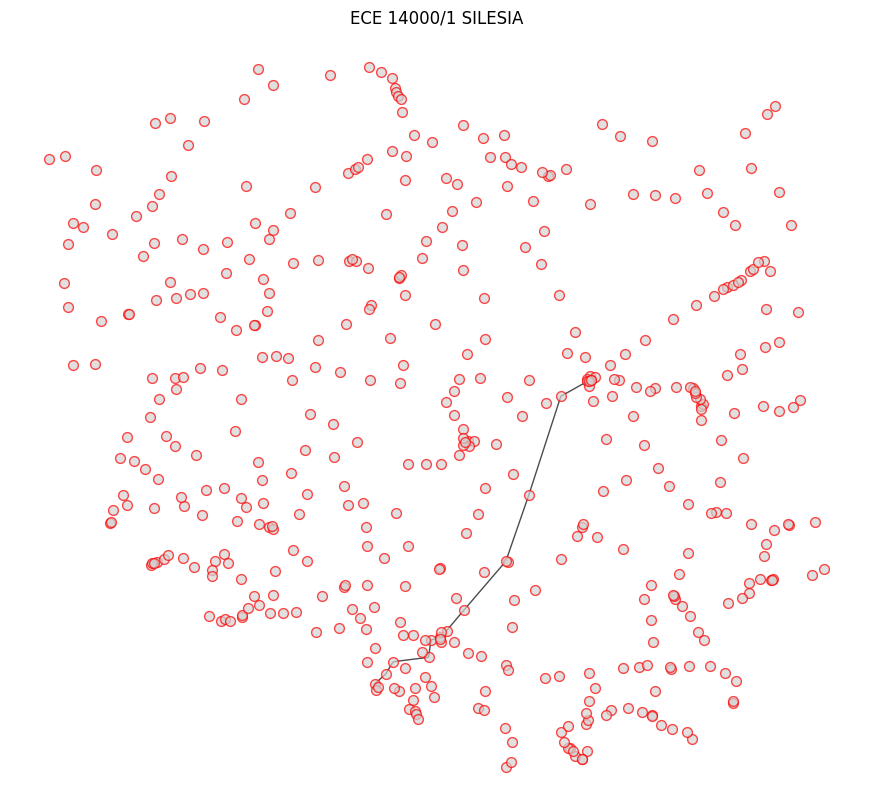

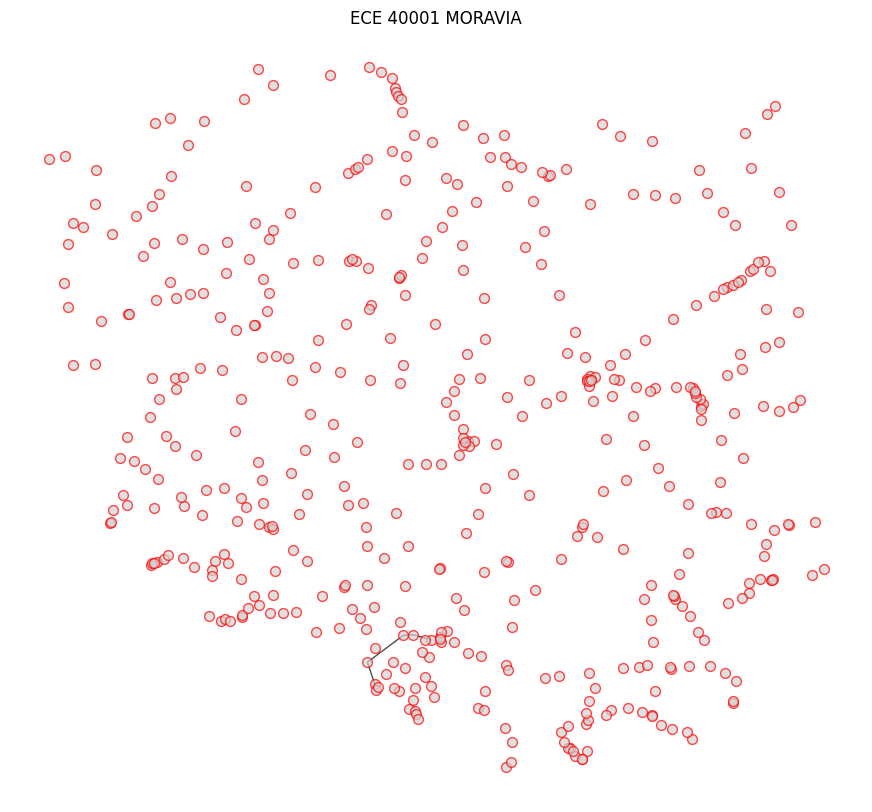

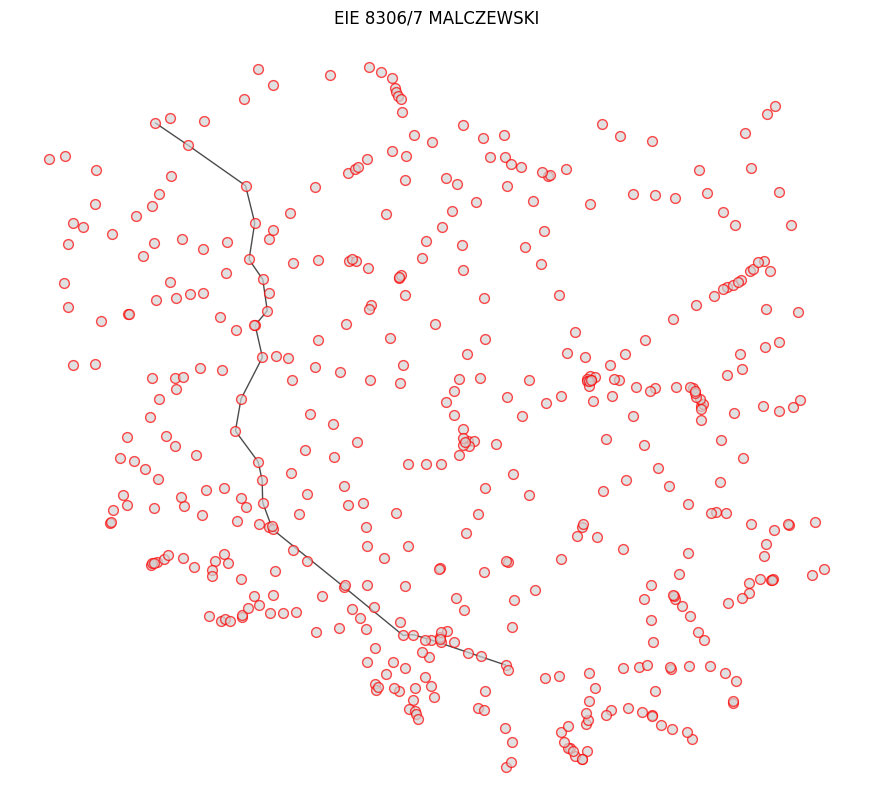

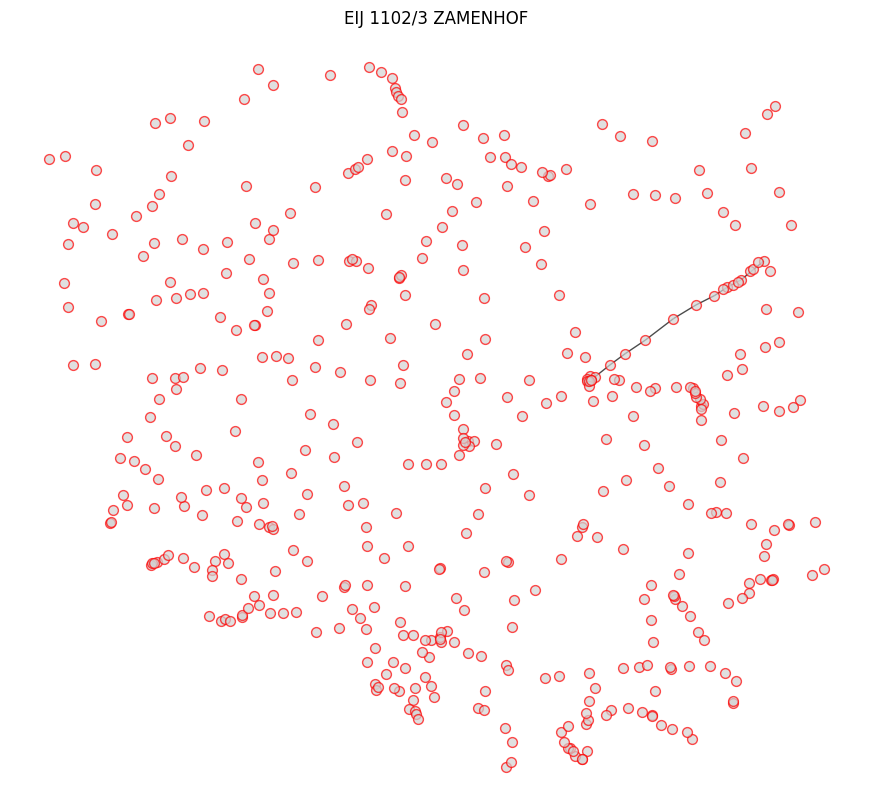

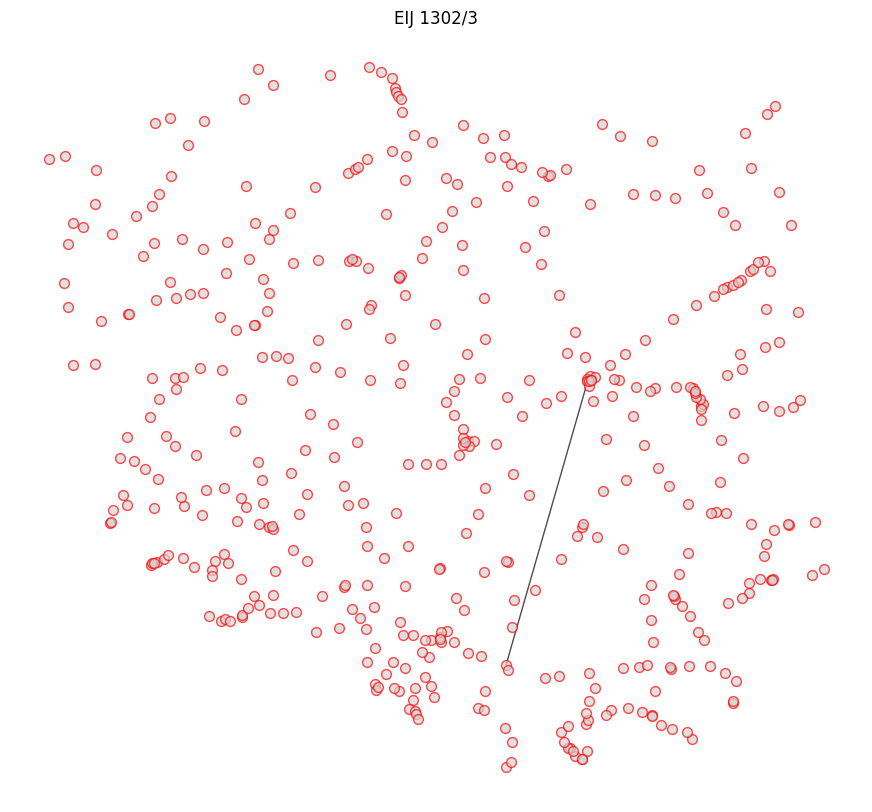

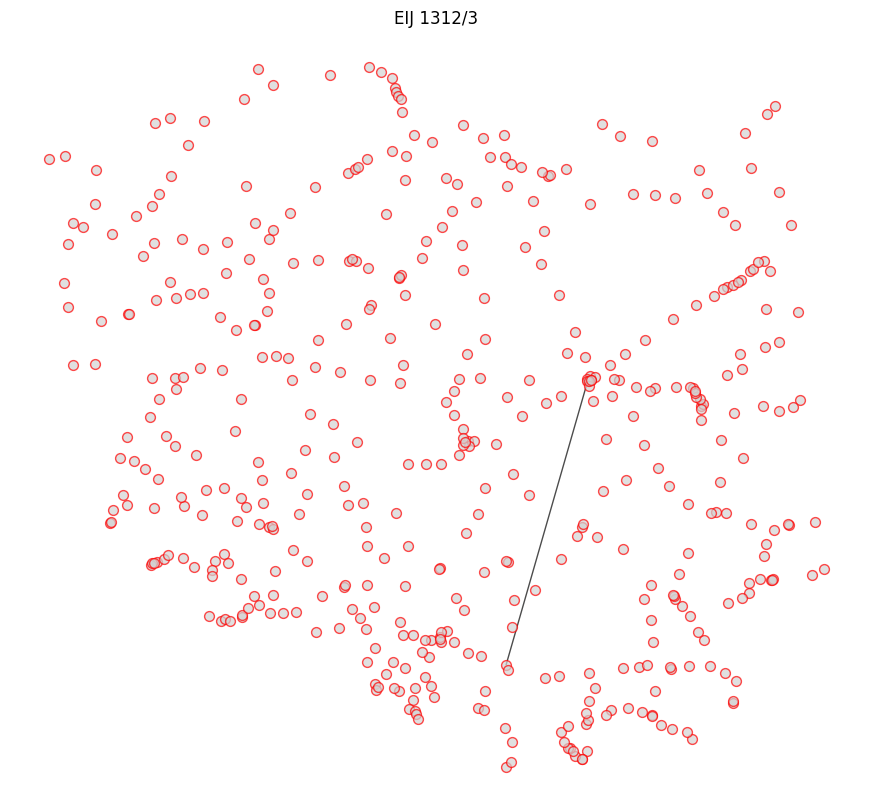

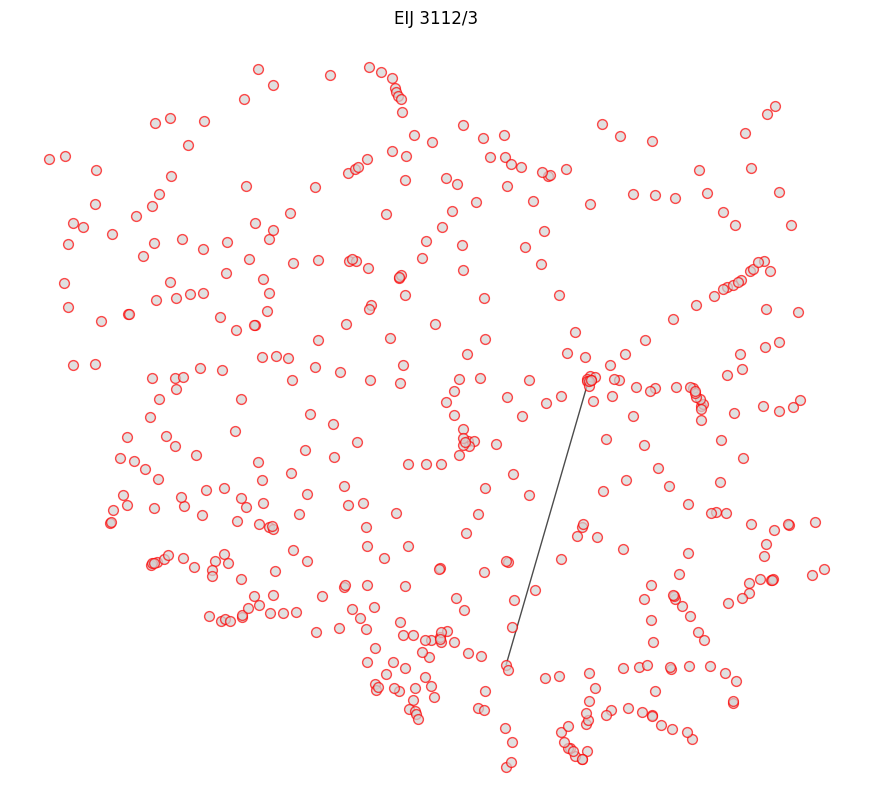

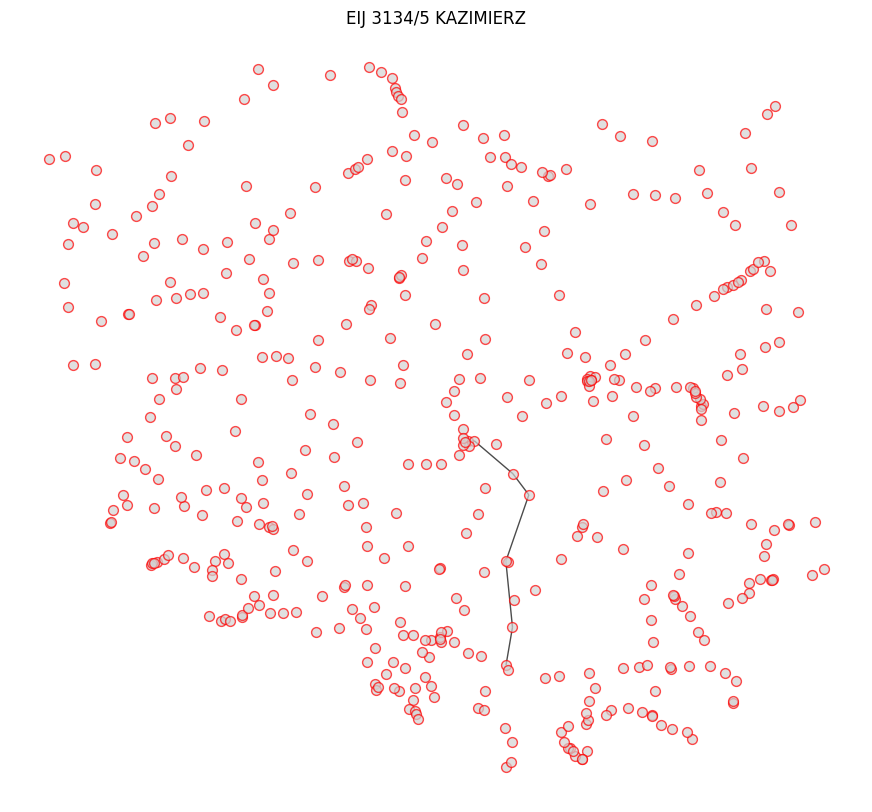

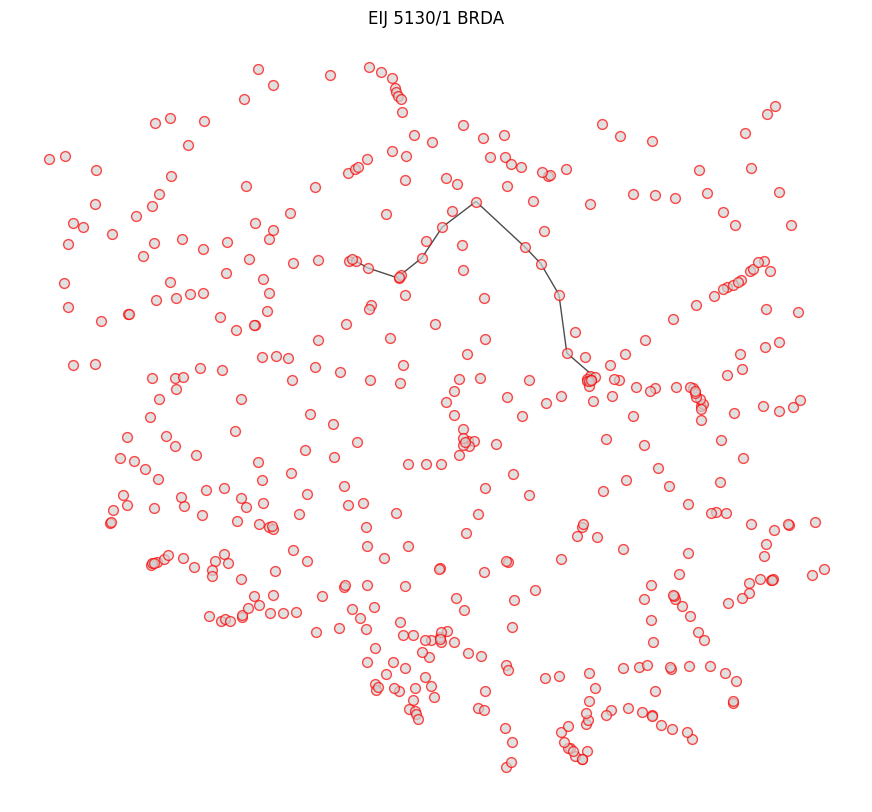

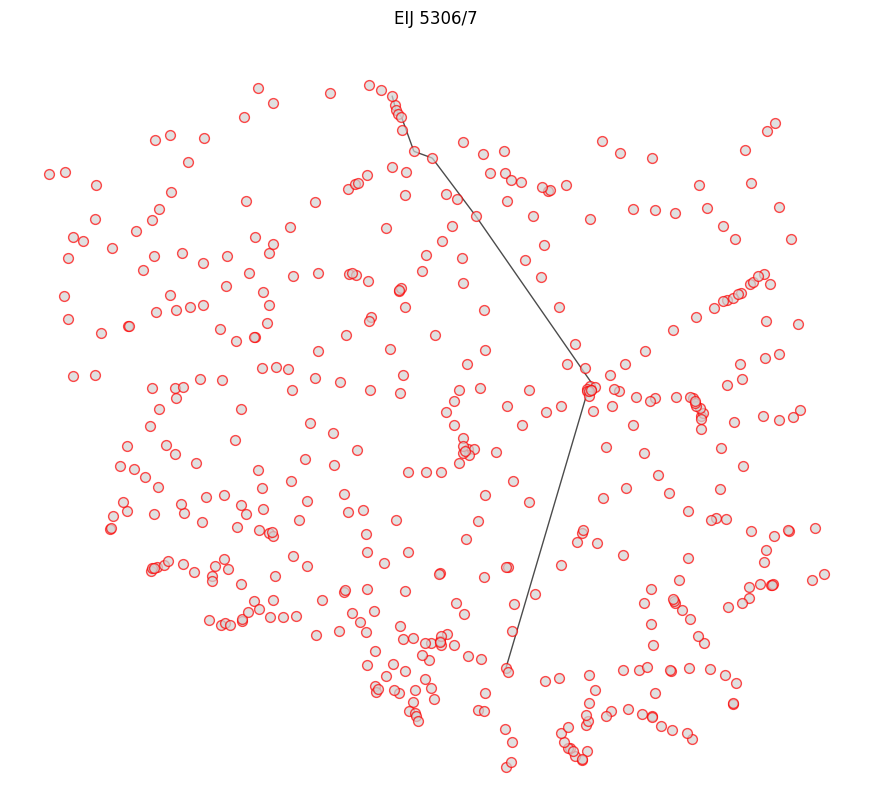

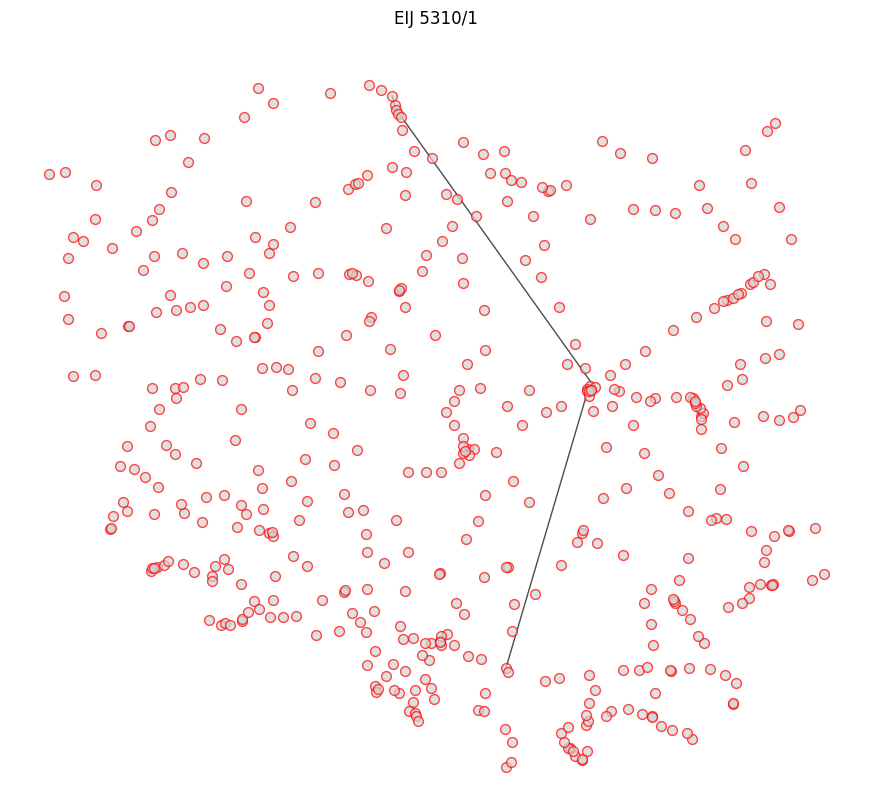

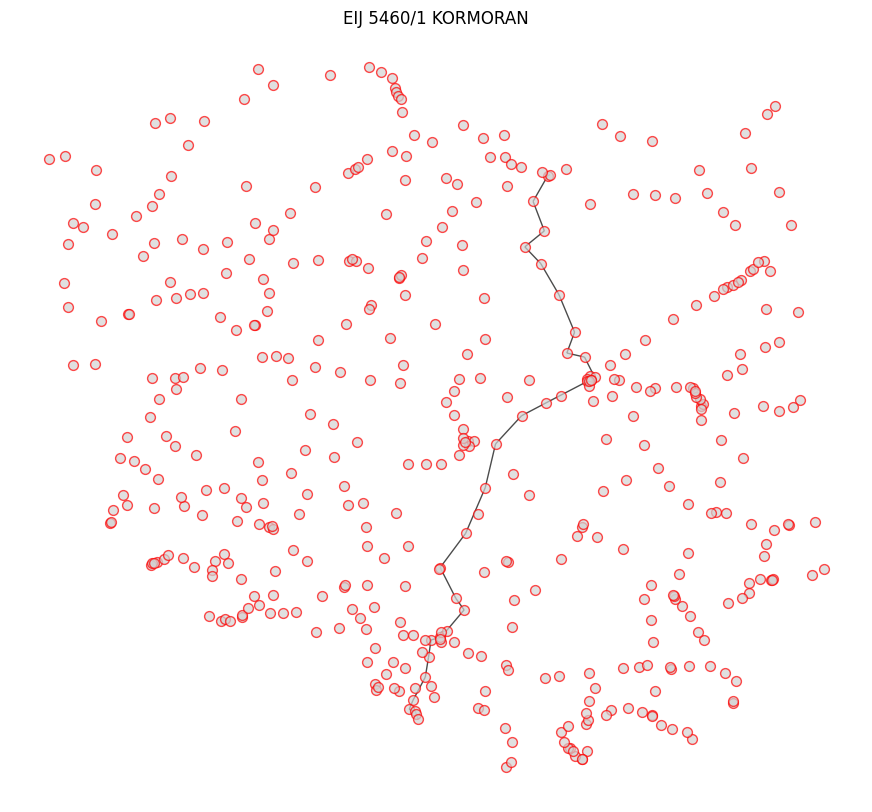

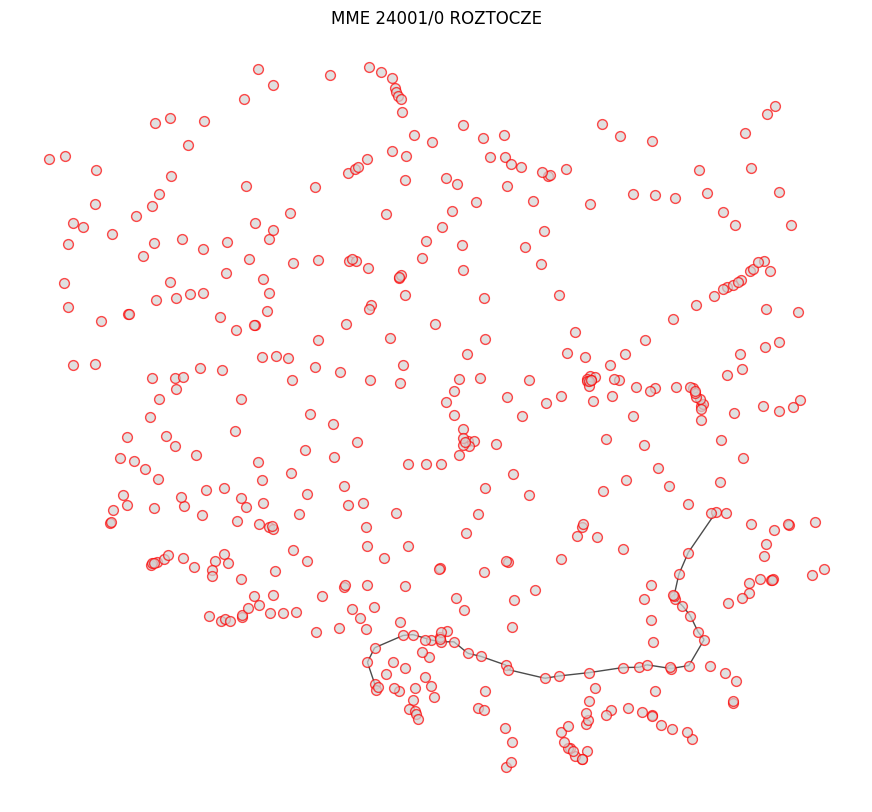

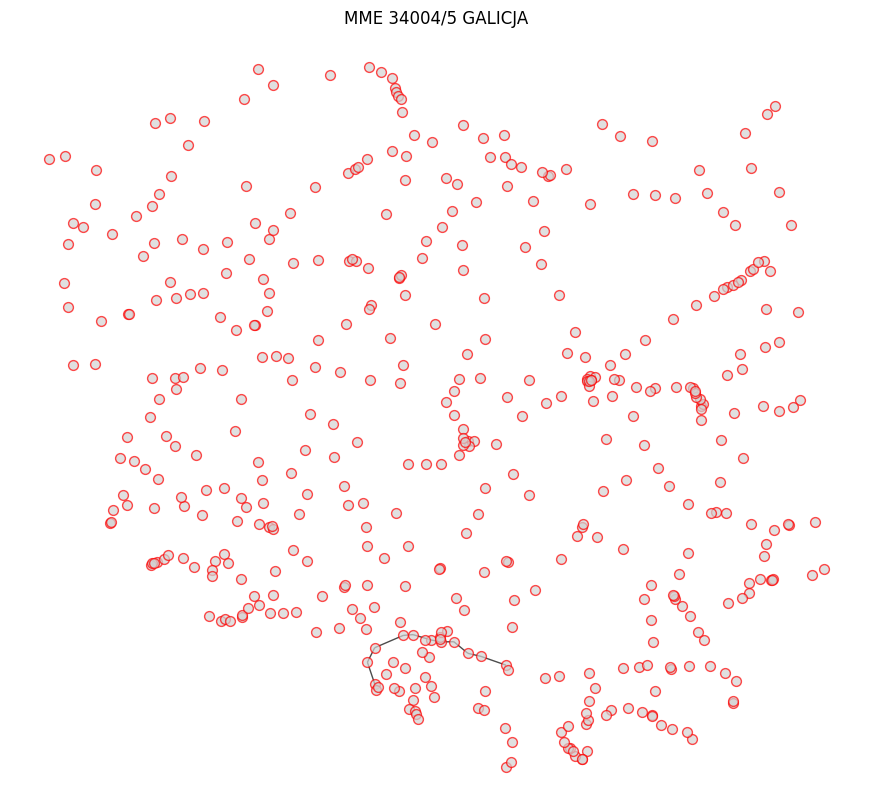

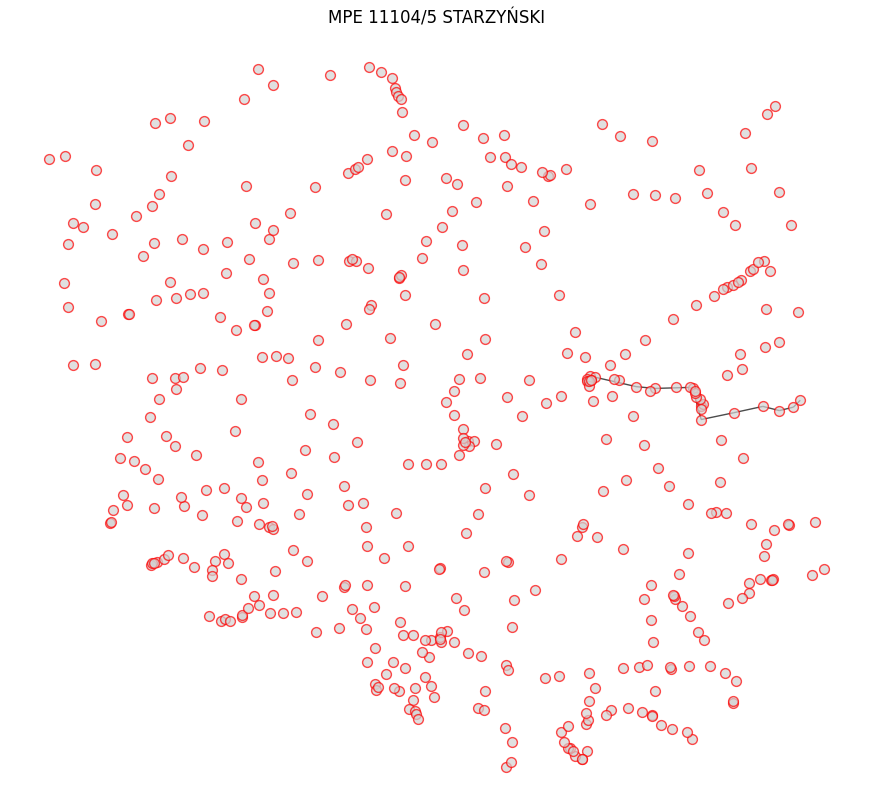

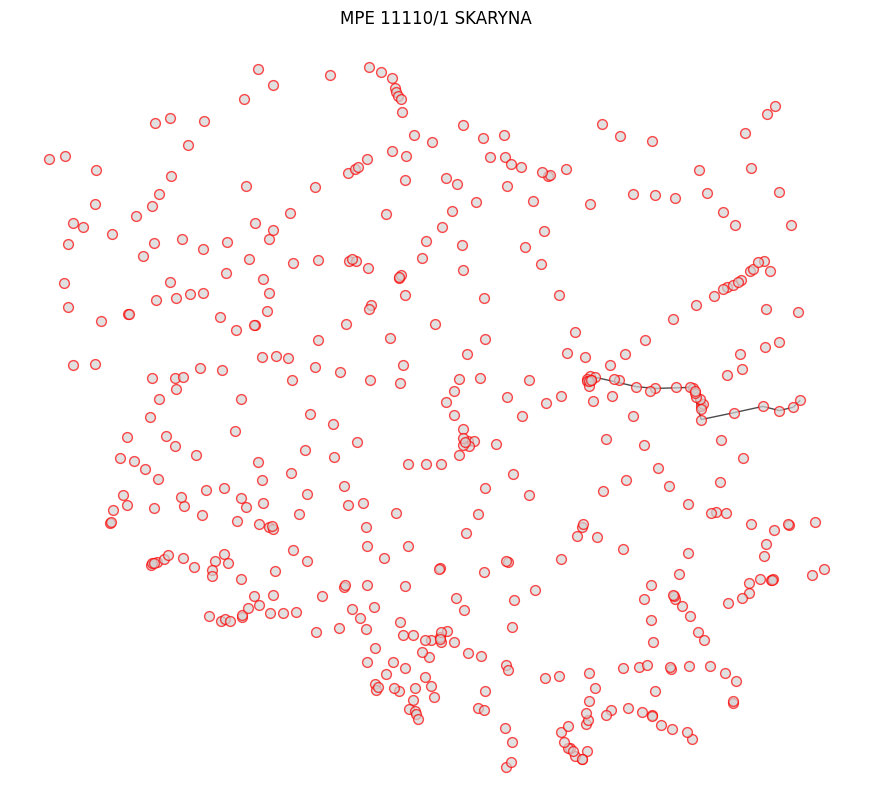

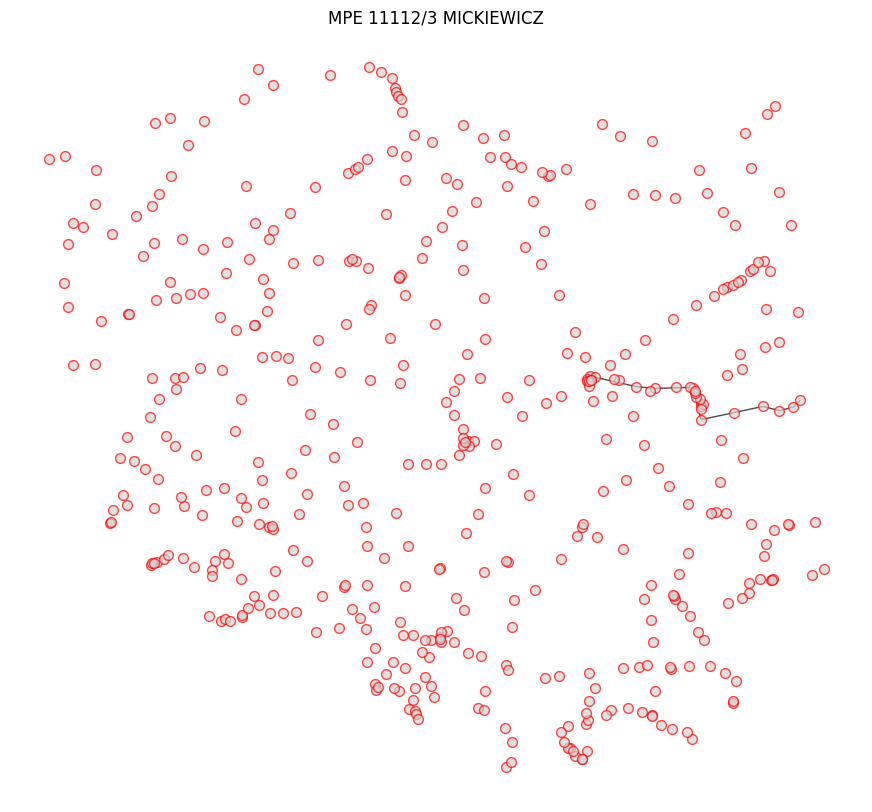

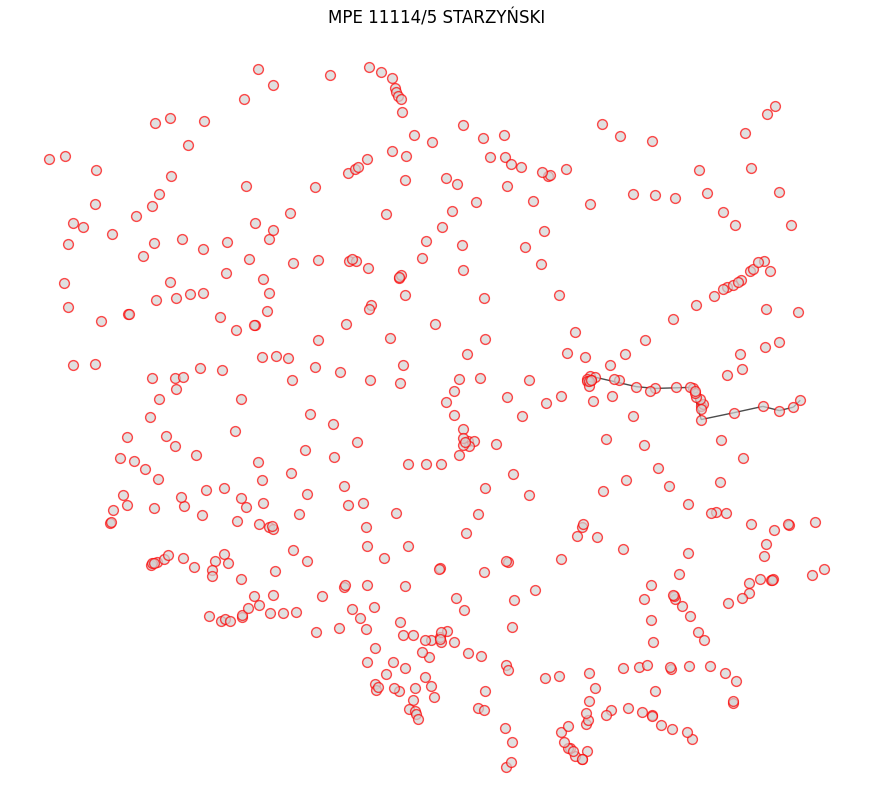

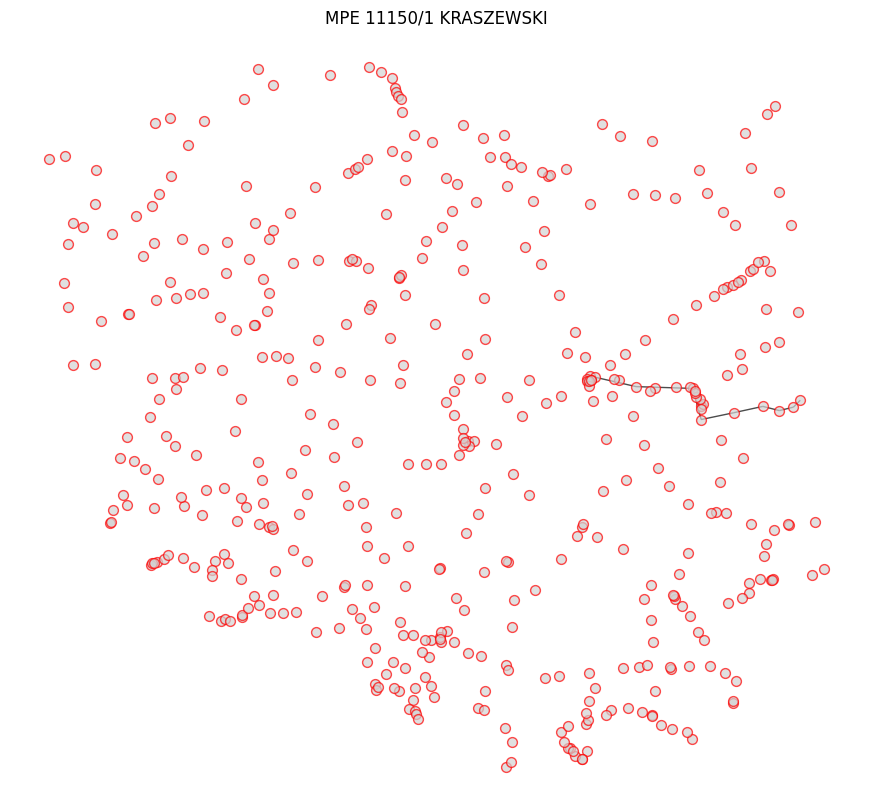

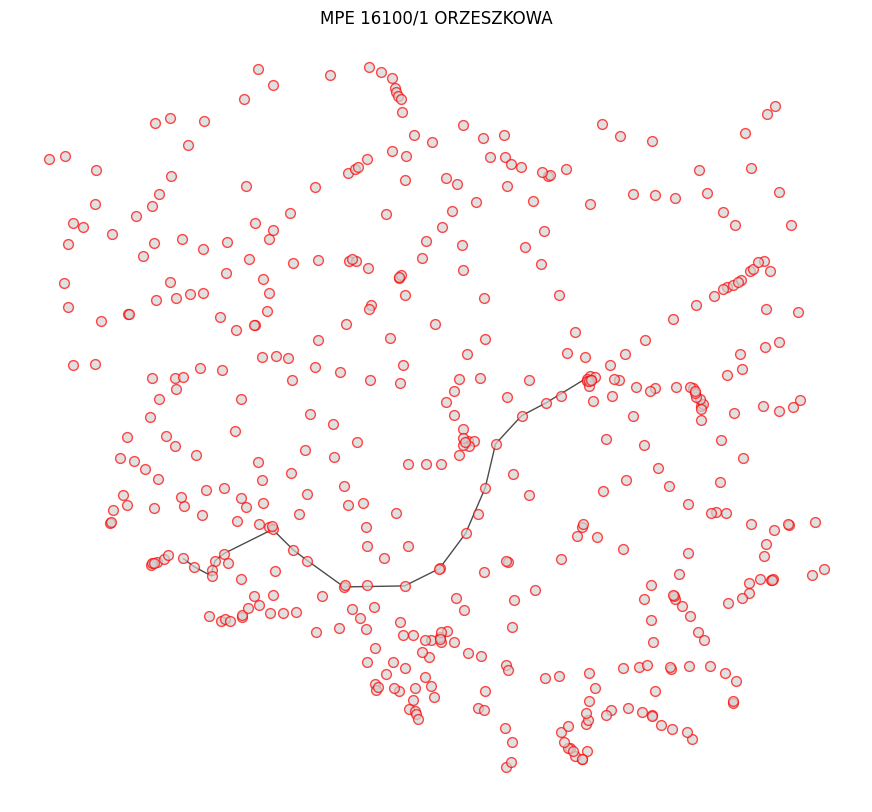

In [12]:
nodes = list(pos.keys())
for train_name in test_trains[:20]:
    plt.figure(figsize=(11,10))
    G = nx.Graph()
    G.add_nodes_from(nodes)
    temp_connections = p.loc[p["nazwa_pociagu"]== train_name][['stacja_wyjazdu','stacja_przyjazdu']].drop_duplicates()
    plt.title(train_name)
    edges = [(conn[1],conn[2]) for conn in temp_connections.itertuples()]
    print(train_name)
    print(edges)
    G.add_edges_from( edges )
    labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
    nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')

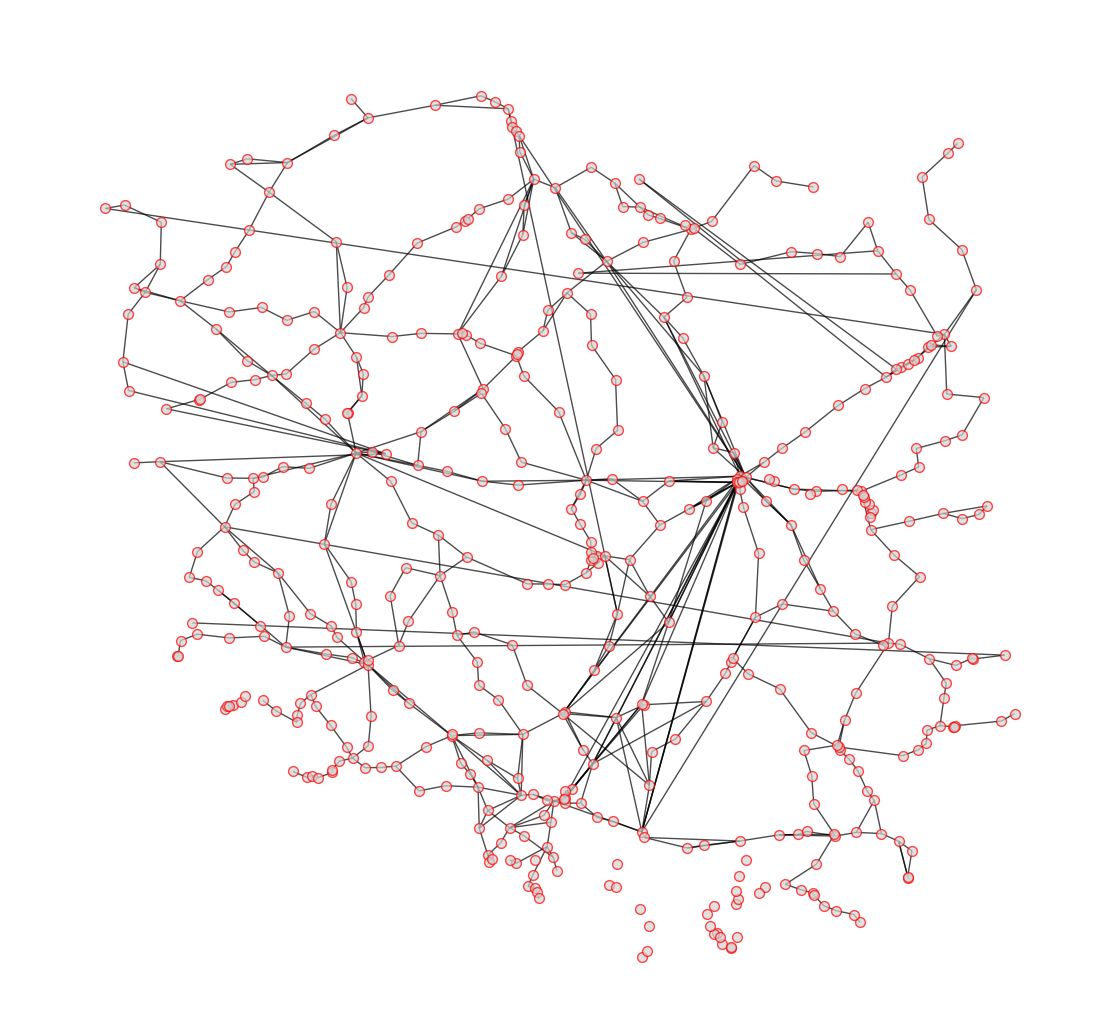

In [31]:
plt.figure(figsize=(11,10))
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from( unique_connections)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')

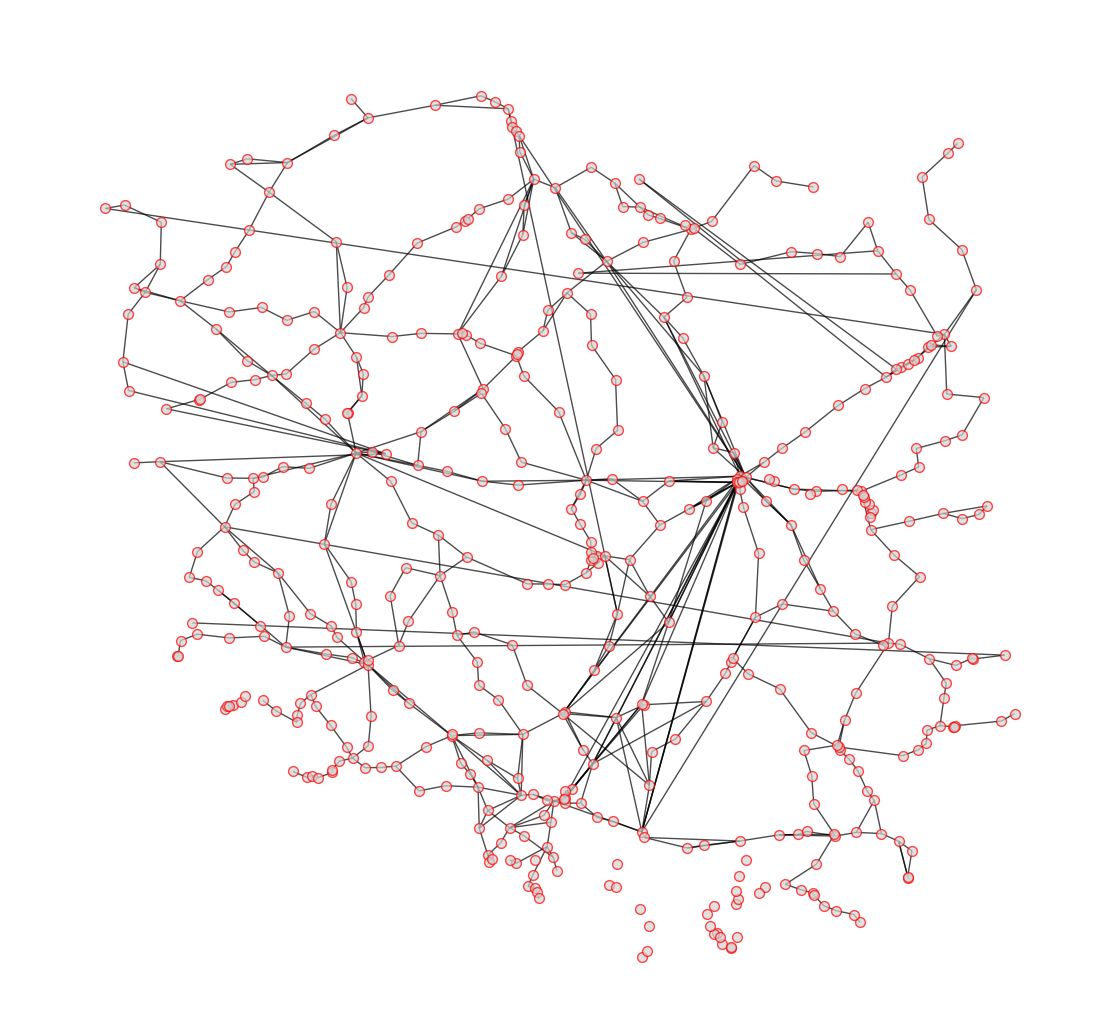

In [27]:
plt.figure(figsize=(11,10))
G = nx.Graph()
#edges = [(conn[1],conn[2]) for conn in unique_connections.itertuples()]
G.add_nodes_from(nodes)
G.add_edges_from( unique_connections)
labels = {node: "-".join([w[:2] for w in re.split('\s',node)]) for node in G.nodes()}
nx.draw(G,pos,node_size=50,alpha=0.7,edgecolors='red', node_color='lightgray')